<a href="https://colab.research.google.com/github/ghofranetayari/MNISTImageRecognition/blob/main/MNISTImageRecognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install tensorflow
!pip install tensorflow_datasets
!pip install matplotlib
!pip install tensorflow-datasets


In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np


In [6]:
(bd_en, bd_te), info = tfds.load('mnist' , split=['train','test'], with_info=True, as_supervised=True)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.


In [7]:
info

tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_dir='/root/tensorflow_datasets/mnist/incomplete.5BJWYG_3.0.1/',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
      journal={ATT Labs [Online]. Available: http://yann.lecun.com/exdb/mnist},
      volume={2},
      year={2010}
    }""

In [8]:
def normaliser (image,label):
  return tf.cast(image, tf.float32)/255 , label
  bd_en = bd_en.map(normaliser)
  bd_te = bd_te.map(normaliser)
  bd_en = bd_en.shuffle(info.splits['train'].num_examples)
  bd_en = bd_en.batch(128)

Image shape: (28, 28, 1), Label shape: ()


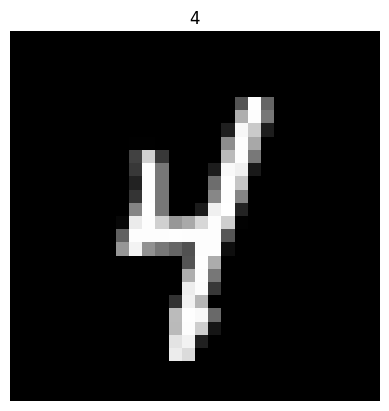

In [9]:
def afficher_image(image, label):
    # Convertir le tensor en tableau NumPy pour l'affichage
    plt.imshow(image.numpy().squeeze(), cmap='gray')  # Remove extra dimension (28, 28, 1)
    plt.title(f'{label.numpy()}')  # Convertir également le label en NumPy
    plt.axis('off')  # Cacher les axes
    plt.show()  # Afficher l'image

# Exemple d'utilisation
for image, label in bd_en.take(1):
    # Afficher les formes des tensors
    print(f"Image shape: {image.shape}, Label shape: {label.shape}")

    # Vérifier si image et label sont scalaires ou non
    if image.ndim == 3:  # Si c'est une image avec une dimension de profondeur (ex: 28x28x1)
        afficher_image(image, label)  # Utilisez label directement si c'est un scalaire
    elif image.ndim == 2:  # Si c'est une image en niveaux de gris (ex: 28x28)
        afficher_image(image, label)  # Aucune indexation nécessaire
    else:
        print("Image format non pris en charge.")


In [10]:
# Normalisation et aplatir les images
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0  # Normaliser les valeurs des pixels
    image = tf.reshape(image, (28 * 28,))  # Aplatir l'image en un vecteur de taille 784
    return image, label

# Vérifier la forme des images avant d'appliquer le prétraitement
for img, lbl in bd_en.take(1):
    print(f"Image shape before preprocess: {img.shape}")

# Appliquer le prétraitement
bd_en = bd_en.map(preprocess)
bd_te = bd_te.map(preprocess)

# Vérifier la forme après le prétraitement
for img, lbl in bd_en.take(1):
    print(f"Image shape after preprocess: {img.shape}")

# Définir le modèle
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(28 * 28,)),  # Entrée aplatie
    tf.keras.layers.Dense(128, activation='relu'),  # Couche cachée avec 128 neurones
    tf.keras.layers.Dense(10, activation='softmax')  # Couche de sortie pour 10 classes
])

# Compiler le modèle
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraîner le modèle
model.fit(bd_en.batch(32), epochs=5, validation_data=bd_te.batch(32))

Image shape before preprocess: (28, 28, 1)
Image shape after preprocess: (784,)
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.8764 - loss: 0.4338 - val_accuracy: 0.9596 - val_loss: 0.1335
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9636 - loss: 0.1227 - val_accuracy: 0.9694 - val_loss: 0.1011
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9755 - loss: 0.0820 - val_accuracy: 0.9730 - val_loss: 0.0885
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9828 - loss: 0.0596 - val_accuracy: 0.9756 - val_loss: 0.0804
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9876 - loss: 0.0441 - val_accuracy: 0.9750 - val_loss: 0.0815


Image 1 shape: (784,), Label shape: ()


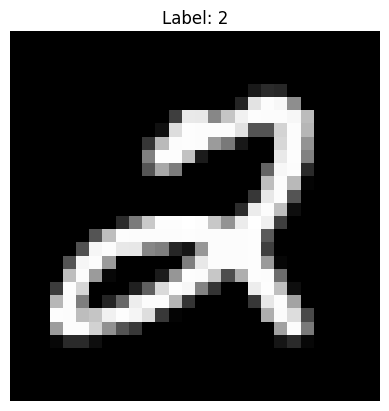

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Probabilités : [1.4931624e-09 9.8441078e-09 9.9999714e-01 4.4361815e-07 2.0736431e-06
 2.1988491e-08 1.5971183e-07 3.0038607e-11 2.7059477e-07 8.9147023e-10]
Classe prédite: 2, Probabilité: 1.0000
Image 2 shape: (784,), Label shape: ()


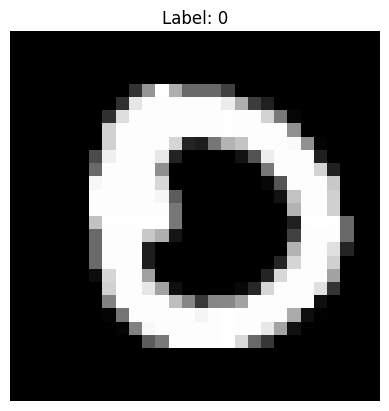

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Probabilités : [9.9999928e-01 1.6988334e-13 5.5481269e-11 2.9987108e-14 5.1845897e-14
 3.5012814e-08 6.7518039e-07 1.7280327e-10 3.1232881e-12 4.5242088e-11]
Classe prédite: 0, Probabilité: 1.0000
Image 3 shape: (784,), Label shape: ()


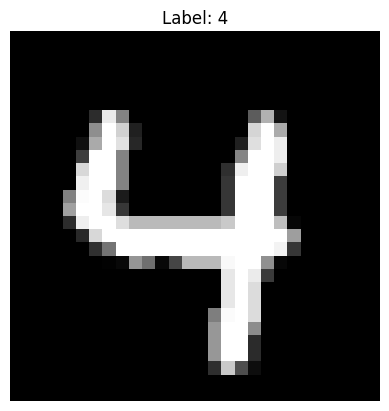

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Probabilités : [1.7625609e-12 1.6237868e-09 3.2234089e-09 1.8237366e-10 9.9999380e-01
 1.8706059e-11 9.6610272e-12 3.0712522e-07 1.5972713e-09 5.8900036e-06]
Classe prédite: 4, Probabilité: 1.0000
Image 4 shape: (784,), Label shape: ()


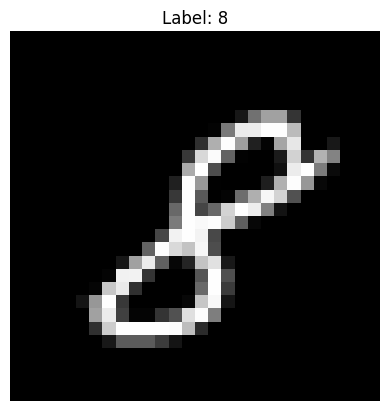

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Probabilités : [3.9228500e-04 3.4522807e-05 5.4155749e-05 1.6294322e-04 8.1461700e-09
 1.8619288e-05 6.8852845e-05 3.7514232e-07 9.9922121e-01 4.7047513e-05]
Classe prédite: 8, Probabilité: 0.9992
Image 5 shape: (784,), Label shape: ()


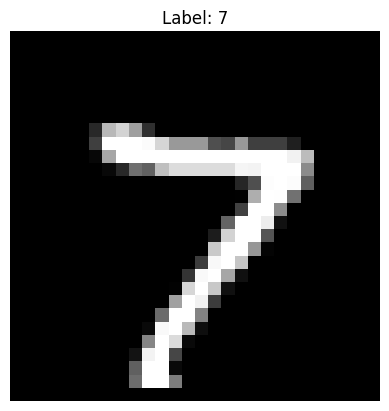

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Probabilités : [4.2558032e-08 7.2924361e-10 5.4558507e-07 4.0591405e-07 9.7858032e-12
 6.2136039e-09 2.6409094e-13 9.9999583e-01 1.2725023e-08 3.1654147e-06]
Classe prédite: 7, Probabilité: 1.0000


In [22]:
# Exemple d'utilisation pour tester plusieurs images
for i, (image, label) in enumerate(bd_te.take(5)):  # Ici, on prend 5 images
    print(f"Image {i+1} shape: {image.shape}, Label shape: {label.shape}")
    afficher_image(image, label)  # Affiche l'image et son label

    prediction = model.predict(image[None, :])[0]  # Ajouter une dimension batch

    # Afficher toutes les probabilités
    print(f'Probabilités : {prediction}')

    # Classe prédite avec la probabilité la plus élevée
    predicted_label = np.argmax(prediction)
    probability = np.max(prediction)

    print(f'Classe prédite: {predicted_label}, Probabilité: {probability:.4f}')
    print("="*50)  # Pour séparer chaque image
